# Apartado X. Aplicación de Kruskal y Dijkstra a redes multicast

En la representación de redes multicast y para calcular valores de tranporte de datos o montaje de las mismas podemos usar 2 algoritmos de la teoría de grafos para saber por qué enlaces va a llegar la información de manera que sean los más cortos desde un nodo emisor a los demás routers (kruskal) o si envío un mensaje desde un nodo emisor a uno receptor, cuáles son los enlaces más cortos por los que pasa para que llegue la información (Dijkstra).

El algoritmo de Kruskal viene a representar un árbol recubridor de peso mínimo, de manera que la información llegue a todos los nodos por los enlaces más cortos y, el algoritmo de Dijkstra viene a resolver el problema del camino mínimo. Un camimo mínimo es un árbol recubridor utilizado para la búsqueda de camino de peso mínimo de aristas.

En el **algoritmo de kruskal**, lo primero que tenemos que cerciorarnos es de que el grafo sea conexo y funciona de la siguiente manera:
- Se crea un bosque B (un conjunto de árboles), donde cada vértice del grafo es un árbol separado
- Se crea un conjunto C que contenga a todas las aristas del grafo
- Mientras C es no vacío
    - Eliminar una arista de peso mínimo de C
    - Si esa arista conecta dos árboles diferentes se añade al bosque, combinando los dos árboles en un solo árbol
    - En caso contario, se desecha la arista

Al final, el bosque tendrá una sola componente, el cuál formará un árbol de expansión mínimo del grafo.

En el **algoritmo de Dijkstra** Se parte de un vértice inicial **s** a un vértice final t, y tenemos que comprobar que todas las aristas tengan un peso ponderado positivo, cuya suma tiene que ser la menor posible.

El funcionamiento del Algoritmo es el siguinete:

- En cada iteracióna a cada vértice v ∈ V se le asignan dos etiquetas que pueden ser temporales o permanentes (&,P):
    - La etiqueta & es una estimación de la longitud del camino mínimo desde el vértice inicial hasta el actual.
    - La etiqueta P es una estimación del predecesor del vértice v en dicho camino.

El objetivo principal de este ejercicio es estudiar el comportamiento del algoritmo para la transmisión de información en redes multicast, es decir, a través del algoritmo consguiremos construir una red de routers repartidos de manera que se utilice la menor cantidad posible de clables entre los nodos.

Para ello va a ser necesario calcular el camino más corto que une cualquier par de nodos de la red, así como el coste de la trasnmisión. Para ello se ha de ejecutar el algoritmo consecutivamente tomando en cada caso, como nodo de origen, cada uno de los nodos del grafo.

Añadimos algunas funciones necesarias para resolver el ejercicio:

In [9]:
def arbol_bfs(digrafo,vertice):
    '''
    (T,l)=arbol_bfs(digrafo,vertice) devuelve el árbol BFS del "digrafo" con raíz 
    en "vertice" y la lista ordenada de vértices visitados.   
    Si quisieras obtener el bfs de un grafo simple G, antes habrás de convertirlo 
    en digrafo con la orden G.to_directed()
    '''
       
    visitado=[False for i in range(digrafo.order())]
    vertices_bfs=[]
    aristas_bfs=[]
    cola=[]
    
    vertices_bfs.append(vertice)
    cola.append(vertice)
    indice=digrafo.vertices().index(vertice)
    visitado[indice]=True
    while len(cola)>0:
        x=cola[0]
        for i in sorted(digrafo.neighbors_out(x)):
            indice=digrafo.vertices().index(i)
            if not visitado[indice]:
                cola.append(i)
                visitado[indice]=True
                vertices_bfs.append(i)
                aristas_bfs.append((x,i))
        cola.remove(x)
    
    arbolbfs=DiGraph()
    arbolbfs.add_vertices(vertices_bfs)
    arbolbfs.add_edges(aristas_bfs)  
    return (arbolbfs,vertices_bfs)

In [13]:
def Kruskal(grafo):
    
    
    if not grafo.is_connected():
        #Si el grafo no es conexo lo advierte.
        print ("Lo siento. El grafo no es conexo.")
        return (Graph(),0)
    else:
        if not grafo.weighted():
            #Si el grafo no es ponderado lo convierte a ponderado
            #con las aristas de peso=1
            grafo.weighted(True)
            for a in grafo.edges():
                grafo.set_edge_label(a[0],a[1],1)
    
        funcion_peso = lambda e: grafo.edge_label(e[0],e[1])
        aristas=grafo.min_spanning_tree(weight_function=funcion_peso)
        recubridor=Graph()
        recubridor.weighted(True)
        recubridor.add_edges(aristas)
        
        #Colocamos el peso de las aristas del árbol recubridor
        for a in recubridor.edges():
            recubridor.set_edge_label(a[0],a[1],grafo.edge_label(a[0],a[1]))
    
        #Sumamos el peso del árbol
        peso=0
        for b in recubridor.edges():
            peso+=recubridor.edge_label(b[0],b[1])
    
        return (recubridor,peso)

In [15]:
def Djkstra(G,s):
    
    #Si G no es ponderado poner peso 1 a las aristas
    if not G.weighted():
        G.weighted(True)
        for a in G.edges():
            G.set_edge_label(a[0],a[1],1)
    
    #Controlar si G es conexo
    if not G.is_connected():
        print ("El grafo no es conexo.")
        print ("Se obtendrá el árbol de camino mínimo de la componente conexa del vértice ")
    
    cc=G.connected_component_containing_vertex(s)
    vtodos=G.vertices()
  
    
    n=G.order()
    Padres=[[] for _ in range(n)] #Inicializar padres de los vértices
    D=[1000000000 for _ in range(n)] #Etiquetas igual a "infinito"

    inds=vtodos.index(s)
    D[inds]=0
    Q=set(cc)
    while len(Q)>0:
        #Buscamos el vértice de Q con menor etiqueta
        v=None
        low=1000000000
        for u in Q:
            indu=vtodos.index(u)
            if D[indu]<low:
                v=u
                low=D[indu]
        #Actualizamos etiquetas
        indv=vtodos.index(v)
        Q.remove(v)
        Adj=set(G.neighbors(v))
        for u in Adj.intersection(Q):
            larista=G.edge_label(v,u)
            indu=vtodos.index(u)
            if D[indu]>D[indv]+larista:
                D[indu]=D[indv]+larista
                Padres[indu]=[v]
    P={}  #Dicionario con los padres de cada vértice
    for u in cc:
        indu=vtodos.index(u)
        P.setdefault(u,Padres[indu])             
    T=Graph(P) #Árbol de camino mínimo
    T.weighted(True)
    for a in T.edges():
        T.set_edge_label(a[0],a[1],G.edge_label(a[0],a[1]))
    
    return D,T

Se pide:

**a) Determinar un esquema que utilice el menor número de enlaces posibles y la menor distancia de manera que podamos enviar un mensaje desde el router A al resto de routers, para poder formar nuestra red con la menor cantidad de cable posible.**

En primer lugar construimos el grafo:

In [7]:
GA=Graph(weighted=True)
aristas=[('A', 'B', 5), ('A', 'C', 7), ('B', 'C', 2), ('D', 'E', 2), ('B', 'D', 9), ('B', 'E', 5), ('D', 'C', 8),
         ('C', 'E', 6), ('D', 'F', 5), ('E', 'F', 16), ('F', 'I', 23), ('C', 'I', 5), ('C', 'H', 6), ('C', 'G', 11), 
         ('G', 'B', 12)]
GA.add_edges(aristas)

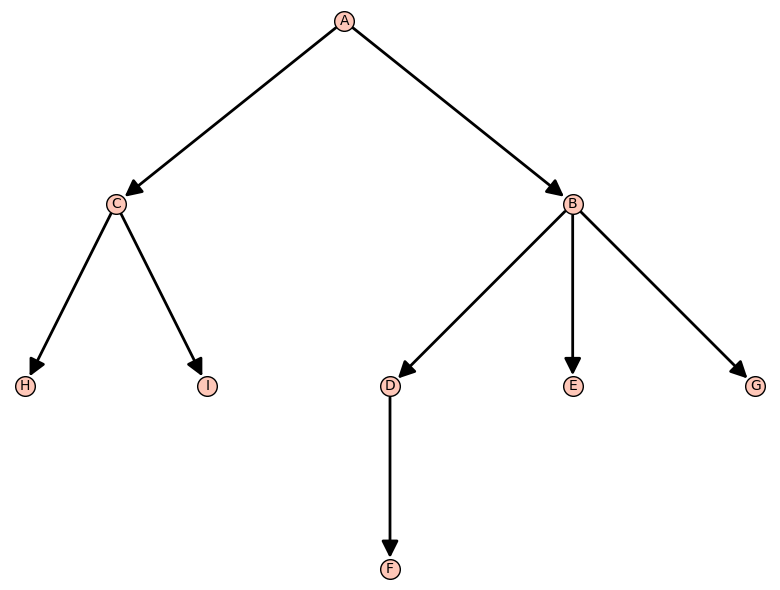

In [18]:
#Lo hacemos dirigido y mostramos el grafo convertido a árbol:
GAp=GA.to_directed()
(BFS, lista)=arbol_bfs(GAp, 'A')
BFS.plot(figsize=9, layout='tree')

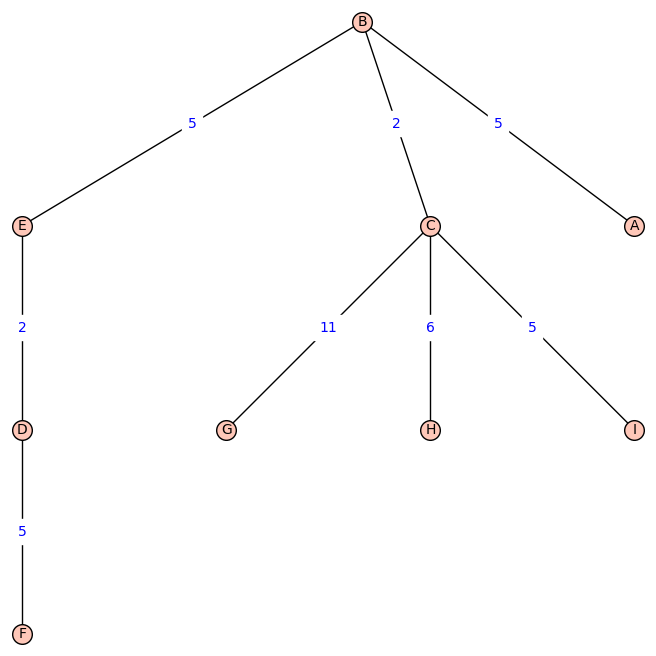

In [19]:
(K,p)=Kruskal(GAp)
K.plot(layout='tree', edge_labels=True, figsize=10)

**b) Determinar un camino por los enlaces más cortos de manera que podamos enviar un mensaje desde el router A hasta el router F.**

In [21]:
(D, DJ) = Djkstra(GAp,'A')
DJ.plot(layout='tree', edge_labels=True, figsize=10)
print("El camino más corto para ir de A a F es: ", DJ.all_paths('A', 'F'))

El camino más corto para ir de A a F es:  [['A', 'B', 'E', 'D', 'F']]
